<a href="https://colab.research.google.com/github/eduardoscovino/Airbnb-data-analysis-sicilia/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sicília*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Sicília, na Itália, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('http://data.insideairbnb.com/italy/sicilia/sicily/2021-12-28/visualisations/listings.csv')

## Análise dos Dados


## **Dicionário das variáveis**

* `id`: id único da alocação
* `name`: nome da alocação
* `host_id`: id único do host
* `host_name`: nome do host
* `neighbourhood_group`: contém apenas valores nulos
* `neighbourhood`: bairro da alocação
* `latitude`: latitude da alocação
* `longitude`: longitude da alocação
* `room_type`: tipo de alocação (quarto privado, apto inteiro, quarto compartilhado, etc.)
* `price`: preço da alocação (moeda não especificada)
* `minimum_nights`: mínimo de noites para efetuar a reserva
* `number of reviews`: número de avaliações da alocação
* `last_review`: data da última avaliação
* `reviews_per_month`: média de avaliações por mês
* `calculated_host_listings_count`: quantidade de alocações do host
* `availability_365`: número de dias em que a alocação está disponível no ano
* `number_of_reviews_ltm`: número de avaliações nos últimos 12 meses
* `license`: licença da alocação

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,7011,SEASIDE - Historic Antique Residence,16888,Salinara Yu&Ad,NaN,Marsala,37.84047,12.47778,Entire home/apt,200,3,31,2021-09-29,0.21,9,167,3,NaN
1,15371,Summer Holidays @ VILLA ROSA,58333,Gianluca,NaN,Petrosino,37.70821,12.51400,Entire home/apt,35,1,6,2016-08-26,0.07,1,364,0,NaN
2,22948,B&B NEAR STATION ROOM WITH BALCONY,88837,Giuseppe,NaN,Agrigento,37.30885,13.58582,Private room,29,1,298,2021-11-29,2.37,3,347,35,NaN
3,28379,Apartment in Taormina - Rinaldo,121867,Francesca,NaN,Taormina,37.85172,15.28420,Entire home/apt,74,2,272,2021-11-04,1.96,5,303,18,NaN
4,35264,Etna-sea a panoramic villa,151644,Serena,NaN,Piedimonte Etneo,37.82464,15.15739,Entire home/apt,164,2,144,2021-09-10,1.03,4,360,2,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
print('O dataset possui: ')
print('{} entradas'.format(df.shape[0]))
print('{} variáveis'.format(df.shape[1]))
print('\n')
print('Abaixo estão listados os tipos de cada variável:')
print(df.dtypes)

O dataset possui: 
48066 entradas
18 variáveis


Abaixo estão listados os tipos de cada variável:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
print(df.isnull().sum().sort_values(ascending=False) / df.shape[0])
print('\n')
print('Conclusão Q2: neighbourhood_group e license serão descartadas na análise, pois pela quantidade de valores nulo no dataset, pouco acrescentam nos insights')

neighbourhood_group               1.000000
license                           0.982025
reviews_per_month                 0.305934
last_review                       0.305934
host_name                         0.001227
name                              0.000062
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64


Conclusão Q2: neighbourhood_group e license serão descartadas na análise, pois pela quantidade de valores nulo no dataset, pouco acrescentam nos insights


### **Q3. Qual o tipo de distribuição das variáveis?** 

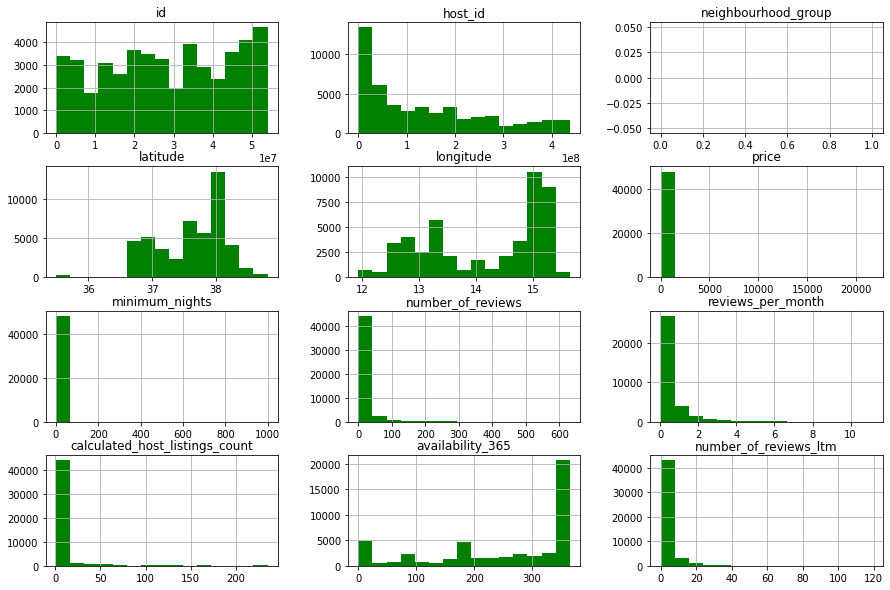

In [6]:
df.hist(bins = 15, figsize =(15, 10), color='green');

#### Das colunas numéricas plotadas acima nos histogramas, destaco sobretudo essas abaixo:

In [7]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,48066.000000,48066.000000,48066.000000,33361.000000,48066.000000,48066.000000,48066.000000
mean,123.570903,3.140973,13.536367,0.510483,9.301793,251.685973,2.586506
std,545.896977,8.708326,32.696828,0.746587,28.459930,125.780672,5.728379
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,50.000000,1.000000,0.000000,0.100000,1.000000,177.000000,0.000000
50%,70.000000,2.000000,2.000000,0.240000,2.000000,303.000000,0.000000
75%,100.000000,3.000000,11.000000,0.590000,5.000000,363.000000,3.000000
max,21633.000000,999.000000,631.000000,11.130000,235.000000,365.000000,119.000000


A seguir, foi desenvolvida uma função para identificar a presença de outliers nas colunas numéricas do nosso dataframe. Segue a fórmula:

IQR = Q3 - Q1

Limite inferior = média - IQR * 1,5

Limite superior = média + IQR * 1,5


Onde:

IQR: Amplitude interquartil

Q1: Primeiro Quartil

Q3: Terceiro Quartil


Fonte:

https://aprendendogestao.com.br/2016/08/26/identificacao-de-outliers/


In [32]:
# função para determinar a presença de outliers no dataframe

def calc_outlier(q3, q1, media, max, min):
  iqr = q3 - q1
  lsup = media + iqr*1.5
  linf = media - iqr*1.5
  if max > lsup and min < linf:
    return 'Outlier máx e mín'
  elif  max > lsup and min > linf:
    return 'Outlier máx'
  elif max < lsup and min < linf:
    return 'Outlier mín'
  else:
    return 'Sem outlier'

###### Price

In [30]:
print('O valor mínimo de price é %s. É muito improvável que haja uma alocação gratuita.' % min(df.price))
print('O valor máximo de price é %s. Isso chama a atenção, pois é muito maior que Q3, que é 100.00' % max(df.price))
print('\n')
print('Cálculo para achar outlier:')
print(calc_outlier(df.price.quantile(0.75), df.price.quantile(0.25), df.price.mean(), df.price.max(), df.price.min()))

O valor mínimo de price é 0. É muito improvável que haja uma alocação gratuita.
O valor máximo de price é 21633. Isso chama a atenção, pois é muito maior que Q3, que é 100.00


Cálculo para achar outlier:
Outlier máx e mín


###### Minimum_nights

In [31]:
print('O valor mínimo de noites é %s. Parece razoável alugar um airbnb por apenas uma noite.' % min(df.minimum_nights))
print('O valor máximo de noites é %s. Está estranho, pois seriam quase 3 anos de estadia' % max(df.minimum_nights))
print('\n')
print('Cálculo para achar outlier:')
print(calc_outlier(df.minimum_nights.quantile(0.75), df.minimum_nights.quantile(0.25), df.minimum_nights.mean(), df.minimum_nights.max(), df.minimum_nights.min()))

O valor mínimo de price é 1. É muito improvável que haja uma alocação gratuita.
O valor máximo de price é 999. Isso chama a atenção, pois é muito maior que Q3, que é 100.00


Cálculo para achar outlier:
Outlier máx


###### Number_of_reviews

In [36]:
print('ATENÇÃO: Para o número de reviews, seria interessante que o dataset tivesse a informação da data de início de alocações no airbnb.\n')
print('O número mínimo de reviews é %s.' % min(df.number_of_reviews))
print('O número máximo de reviews é %s. Está estranho, pois seriam quase 3 anos de estadia' % max(df.number_of_reviews))
print('\n')
print('Cálculo para achar outlier:')
print(calc_outlier(df.number_of_reviews.quantile(0.75), df.number_of_reviews.quantile(0.25), df.number_of_reviews.mean(), df.number_of_reviews.max(), df.number_of_reviews.min()))
print('\nComo 0 não foi considerado um outlier no limite inferior, acreditamos que no dataset constem muitas alocações novas na plataforma do airbnb. Logo, ainda não foi possível o acúmulo de reviews, mas é apenas uma hipótese.')

ATENÇÃO: Para o número de reviews, seria interessante que o dataset tivesse a informação da data de início de alocações no airbnb.

O número mínimo de reviews é 0.
O número máximo de reviews é 631. Está estranho, pois seriam quase 3 anos de estadia


Cálculo para achar outlier:
Outlier máx

Como 0 não foi considerado um outlier no limite inferior, acreditamos que no dataset constem muitas alocações novas na plataforma do airbnb. Logo, ainda não foi possível o acúmulo de reviews, mas é apenas uma hipótese.


###### Reviews_per_month

In [38]:
print('O número mínimo de reviews por mês é %s.' % min(df.reviews_per_month))
print('O número máximo de reviews por mês é %s.' % max(df.reviews_per_month))
print('\n')
print('Cálculo para achar outlier:')
print(calc_outlier(df.reviews_per_month.quantile(0.75), df.reviews_per_month.quantile(0.25), df.reviews_per_month.mean(), df.reviews_per_month.max(), df.reviews_per_month.min()))

O número mínimo de reviews por mês é 0.01.
O número máximo de reviews por mês é 11.13.


Cálculo para achar outlier:
Outlier máx


###### Calculated_host_listings_count

In [45]:
print('O número mínimo de alocações do host é %s.' % min(df.calculated_host_listings_count))
print('O número máximo de alocações do host é %s. É bem improvável que um mês host tenha tantas alocações assim no airbnb' % max(df.calculated_host_listings_count))
print('\n')
print('Cálculo para achar outlier:')
print(calc_outlier(df.calculated_host_listings_count.quantile(0.75), df.calculated_host_listings_count.quantile(0.25), df.calculated_host_listings_count.mean(), df.calculated_host_listings_count.max(), df.calculated_host_listings_count.min()))
print('\nChama atenção o 1 ter ficado como outlier. A média de alocações por host é de %s' % round(df.calculated_host_listings_count.mean(), 2))

O número mínimo de alocações do host é 1.
O número máximo de alocações do host é 235. É bem improvável que um mês host tenha tantas alocações assim no airbnb


Cálculo para achar outlier:
Outlier máx e mín

Chama atenção o 1 ter ficado como outlier. A média de alocações por host é de 9.3


###### Availability_365

In [48]:
print('O número mínimo de dias disponíveis da alocação é %s.' % min(df.availability_365))
print('O número máximo de dias disponíveis da alocação é %s.' % max(df.availability_365))
print('\n')
print('Cálculo para achar outlier:')
print(calc_outlier(df.availability_365.quantile(0.75), df.availability_365.quantile(0.25), df.availability_365.mean(), df.availability_365.max(), df.availability_365.min()))
print('Não há outlier para dias disponíveis da alocação no ano')

O número mínimo de dias disponíveis da alocação é 0.
O número máximo de dias disponíveis da alocação é 365.


Cálculo para achar outlier:
Sem outlier
Não há outlier para dias disponíveis da alocação no ano


###### Number_of_reviews_ltm

In [56]:
print('O número mínimo de reviews nos últimos 12 meses é %s.' % min(df.number_of_reviews_ltm))
print('O número máximo de reviews nos últimos 12 meses é %s.' % max(df.number_of_reviews_ltm))
print('\n')
print('Cálculo para achar outlier:')
print(calc_outlier(df.number_of_reviews_ltm.quantile(0.75), df.number_of_reviews_ltm.quantile(0.25), df.number_of_reviews_ltm.mean(), df.number_of_reviews_ltm.max(), df.number_of_reviews_ltm.min()))
print('O outlier cai de 631 durante todo o tempo de atividade das alocações para 119 se considerarmos os últimos 12 meses.')

O número mínimo de reviews nos últimos 12 meses é 0.
O número máximo de reviews nos últimos 12 meses é 119.


Cálculo para achar outlier:
Outlier máx
O outlier cai de 631 durante todo o tempo de atividade das alocações para 119 se considerarmos os últimos 12 meses.


### **Q4. Qual a média dos preços de aluguel?**

In [65]:
# ver a média da coluna `price``
print('A média de preços de aluguel é {} euros'.format(round(df.price.mean(), 2)))

A média de preços de aluguel é 123.57 euros


### **Q4. Qual a correlação existente entre as variáveis**

In [13]:
# criar uma matriz de correlação

# mostrar a matriz de correlação


In [14]:
# plotar um heatmap a partir das correlações


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [15]:
# mostrar a quantidade de cada tipo de imóvel disponível


In [16]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q6. Qual a localidade mais cara do dataset?**



In [17]:
# ver preços por bairros, na média


In [18]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [19]:
# ver a média da coluna `minimum_nights``

## Conclusões
